# 1. INTRODUCTION

**1.1 Identity**
- Name : Daniel Satria


**1.2 Dataset Explanation**
- The dataset is about personal information of credit card user.


**1.3 Objective**
- Getting insight from the dataset.
- Creating machine learning model and test it to our dataset.
- Creating model evaluation and model improvement.
- Predicting the class from the data inference.
- Drawing conclusion from overall milestone project.

**1.4 Notebook Disclaimer**
- I will do the title/explanation first, then later write the code.
- The title means to explain what I do or try to do with the code or to explain the output of the code itself.

___

# 2. IMPORT LIBRARY

2.1 Here import some library that will be used in this notebook.

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

___

# 3. DATA LOADING

3.1 Loading dataset
- Here I load the dataset that will be used for this milestone.
- I also show the head and the tail of the dataset as shown below.


In [217]:
df = pd.read_csv('h8dsft_P1M1_daniel_satria.csv')
df.head().T

,0,1,2,3,4
limit_balance,50000,110000,270000,130000,50000
sex,1,2,1,1,1
education_level,1,1,1,1,1
marital_status,2,2,2,1,2
age,39,29,36,45,24
pay_0,0,0,0,0,0
pay_2,0,0,0,0,0
pay_3,0,0,0,0,0
pay_4,0,0,2,0,0
pay_5,0,0,0,0,0


In [218]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


___


# 4. Exploratory Data Analysis / EDA

4.1 Dataset shape
- There are 2965 rows and 24 columns in our dataset.

In [219]:
df.shape

(2965, 24)

4.2 Checking missing value
- There is no missing value in our dataset.

In [220]:
np.isnan(df).any().sum()

0

4.3 Taking data inference
- Here I take one rows as our data inference.
- Before taking the data, we assign the random seed so we can call the exact same data later.
- We got the data from index 1066 as our data inference.

In [221]:
# assign random seed, so the data inf won't be generated all over again whenever we call it
np.random.seed(234)

# taking the 1 data inference from our dataset
data_inf = df.sample(1)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1066,150000,1,1,3,45,0,0,0,0,0,...,33247,34164,34878,3000,1300,1300,1200,1200,0,0


4.4 Dropping data inference from original dataset
- Dropping the data inference from the original dataset, so later the model can predict the brand new data.
- Now, our total dataset have 2964 rows.

In [222]:
df.drop(index=data_inf.index, inplace=True)
df.shape

(2964, 24)

4.5 Spliiting data train and test
- To prevent the leakage of the data, I decide to split the data early in this step.
- So, the model will do optimized work and we also can understand how much the precision of our model.
- Our data train now consist of 2371 rows and 24 columns.

In [223]:
from sklearn.model_selection import train_test_split

#splitting the data train and test
data_train, data_test  = train_test_split(df, train_size=0.8, random_state=3397, stratify=df['default_payment_next_month'])
print('The new shape of our data train is ', data_train.shape)
data_train.head()

The new shape of our data train is  (2371, 24)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2524,50000,1,2,2,34,0,-1,0,0,0,...,27605,29447,30045,91000,1200,600,29057,1076,1300,0
447,50000,1,1,2,29,0,0,0,0,0,...,3253,3640,3512,1000,1186,500,1000,500,1000,0
1779,50000,2,1,2,26,2,2,2,2,2,...,49708,45112,42063,0,4070,1551,0,1528,3273,1
2348,50000,1,1,2,23,4,3,2,0,0,...,9417,9952,9165,88,12,473,825,323,10000,0
2384,50000,1,2,1,50,1,1,-2,-2,-2,...,0,0,0,5000,0,0,0,0,0,0


4.6 Checking duplicated data
- We have 1 dulicated data

In [224]:
data_train.duplicated().sum()

1

4.7 Dropping duplicated data
- After dropping and rechecking the duplicated data, now there is no duplicated data left in our dataset.

In [225]:
data_train.drop_duplicates(inplace=True)
data_train.duplicated().sum()

0

4.8 Insight from describe
- It seems that we have category columns in : sex, education level, marital status, and pay since the value of the columns are limited to some extent of number.
- If we see in bill_amt columns, there is minus values. Perhaps some of us will think it's an abnormal values that the bill have minus values, but in the credit card system it's very possible actually.
- It means that we have surplus credit from our original credit card limit.

In [226]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2370.0,160219.409283,122380.162362,10000.0,50000.00,140000.0,230000.00,780000.0
sex,2370.0,1.607595,0.488389,1.0,1.00,2.0,2.00,2.0
education_level,2370.0,1.851899,0.775037,0.0,1.00,2.0,2.00,6.0
marital_status,2370.0,1.562025,0.521137,0.0,1.00,2.0,2.00,3.0
age,2370.0,35.169620,9.126932,21.0,28.00,33.0,41.00,69.0
pay_0,2370.0,0.022785,1.095054,-2.0,-1.00,0.0,0.00,8.0
pay_2,2370.0,-0.105063,1.169263,-2.0,-1.00,0.0,0.00,7.0
pay_3,2370.0,-0.134177,1.176908,-2.0,-1.00,0.0,0.00,7.0
pay_4,2370.0,-0.177215,1.188017,-2.0,-1.00,0.0,0.00,8.0
pay_5,2370.0,-0.223207,1.165300,-2.0,-1.00,0.0,0.00,7.0


4.9 Checking unique variable in category columns
- Here I try to check how many the unique values in category columns.
- It seems that the values in category columns have been encoded to ordinal way.
- Marital status (0=others, 1=married, 2=single, 3=others).
- Gender (1=male, 2=female).
- Education Level (0=others, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
- Pay amt (Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- Education level & pay columns are ordinal columns and encoded as it is.
- However, the marital status & gender are nominal columns but encoded as ordinal one.

In [227]:
print(' - sex unique variables :', data_train['sex'].unique())
print('='*110)
print('- education_level unique variables :', data_train['education_level'].unique())
print('='*110)
print('- marital_status unique variables :', data_train['marital_status'].unique())
print('='*110)
print('- pay_0 unique variables :', data_train['pay_0'].unique())
print('='*110)
print('- pay_2 unique variables :', data_train['pay_2'].unique())
print('='*110)
print('- pay_3 unique variables :', data_train['pay_3'].unique())
print('='*110)
print('- pay_4 unique variables :', data_train['pay_4'].unique())
print('='*110)
print('- pay_5 unique variables :', data_train['pay_5'].unique())
print('='*110)
print('- pay_6 unique variables :', data_train['pay_6'].unique())

 - sex unique variables : [1 2]
- education_level unique variables : [2 1 3 5 4 6 0]
- marital_status unique variables : [2 1 3 0]
- pay_0 unique variables : [ 0  2  4  1 -1 -2  3  8  6  5]
- pay_2 unique variables : [-1  0  2  3  1 -2  5  7  4]
- pay_3 unique variables : [ 0  2 -2 -1  4  3  6  7]
- pay_4 unique variables : [ 0  2 -2 -1  8  4  7  3  5  6]
- pay_5 unique variables : [ 0  2 -2 -1  3  7  5  4  6]
- pay_6 unique variables : [ 0  2 -2 -1  3  6  7  4]


4.10 Data distibution of education level and marital status.
- Here we can conclude that the amount for class 0 is much higher than class 1.
- In education level we can conclude that the education level 2 have the most highest total amount among others.
- In marital status, class 2 have the highest amount among others.

<AxesSubplot:xlabel='marital_status', ylabel='count'>

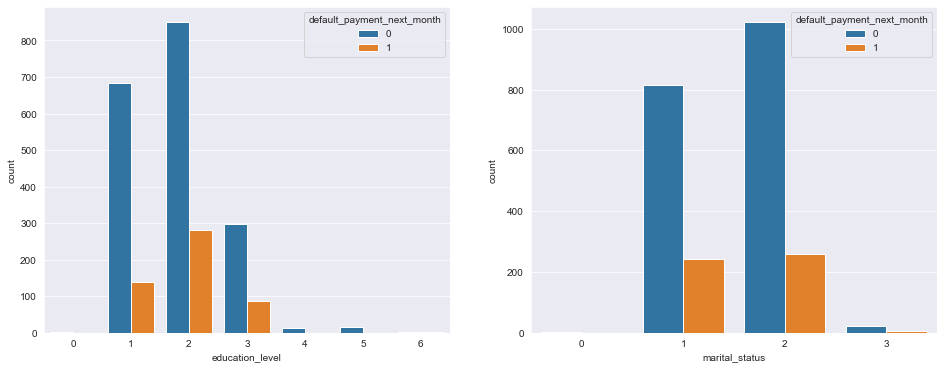

In [228]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.countplot(data=data_train, x='education_level', hue='default_payment_next_month', ax=ax[0])
sns.countplot(data=data_train, x='marital_status', hue='default_payment_next_month', ax=ax[1])

4.11 Data distributin of sex & age
- In sex column, the total gender of class 2 is higher than class 1.
- Default payment next month is higher for 0 in both sex.
- In column age, the distribution is right skew.

<AxesSubplot:xlabel='age', ylabel='Count'>

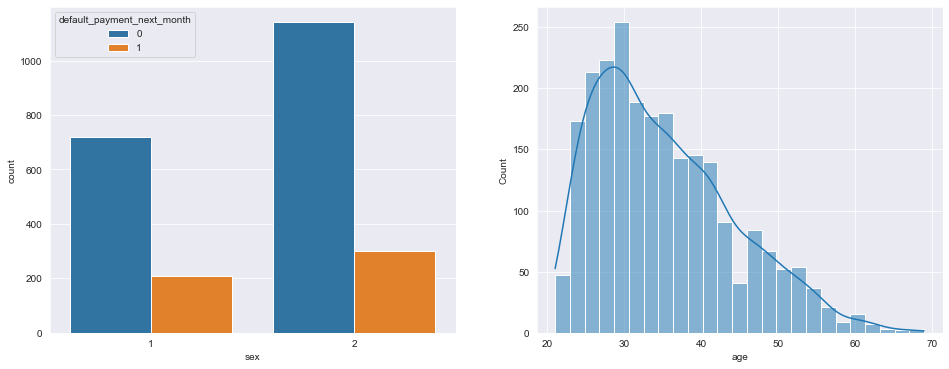

In [229]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.countplot(data=data_train, x='sex', hue='default_payment_next_month', ax=ax[0])
sns.histplot(data=data_train, x='age', kde=True, ax=ax[1])

4.12 Insight from pay
- We can conclude here that the class 0 for default payment next month have the higher value than class 1.
- For all the pay columns (6 columns in total), the values 0 (the use of revolving credit) is the highest values among others.

<AxesSubplot:xlabel='pay_6', ylabel='count'>

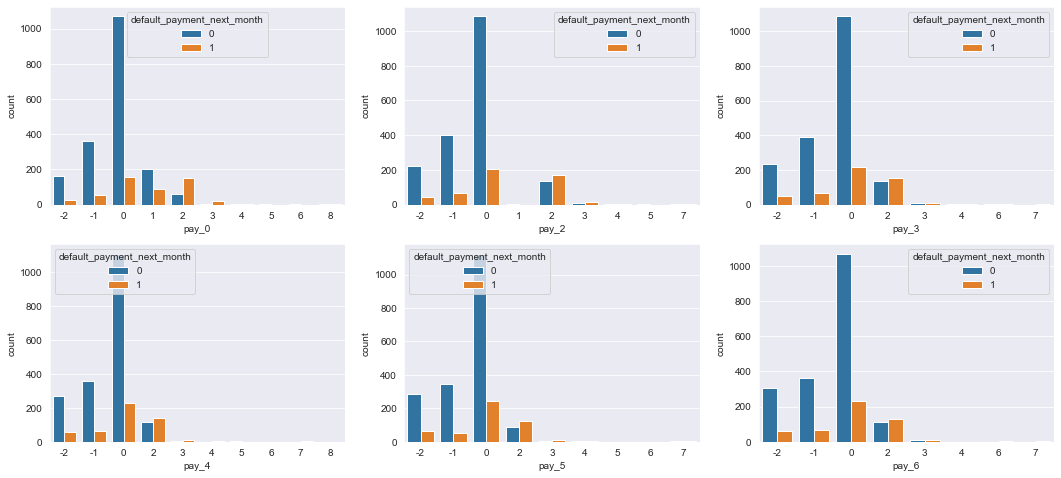

In [230]:
fig, ax = plt.subplots(2,3, figsize=(18, 8))
sns.countplot(data=data_train, x='pay_0', hue='default_payment_next_month', ax=ax[0,0])
sns.countplot(data=data_train, x='pay_2', hue='default_payment_next_month', ax=ax[0,1])
sns.countplot(data=data_train, x='pay_3', hue='default_payment_next_month', ax=ax[0,2])
sns.countplot(data=data_train, x='pay_4', hue='default_payment_next_month', ax=ax[1,0])
sns.countplot(data=data_train, x='pay_5', hue='default_payment_next_month', ax=ax[1,1])
sns.countplot(data=data_train, x='pay_6', hue='default_payment_next_month', ax=ax[1,2])

4.13 Insight from limit balance
- The distribution of the data is right-skew.
- We can see there are several ourliers in the column.

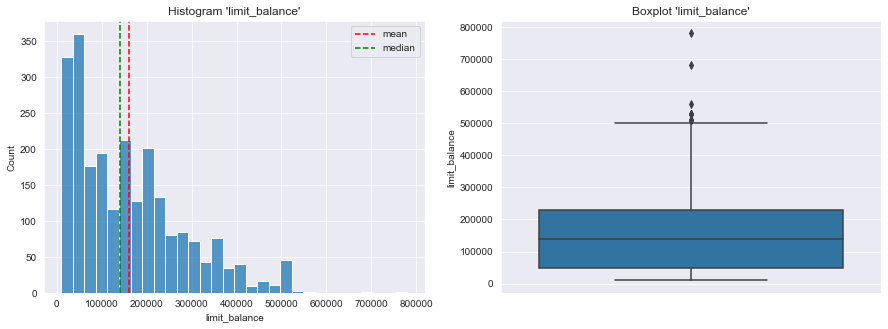

limit_balance Kurtosis: 0.49863771067344054
limit_balance Skewness: 0.9714709243995151
Columns 'limit_balance' is right skewed


In [231]:
#making function for plotting the distribution of the data
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' is right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' is left skewed".format(col))

#plotting the distribution data of limit_balance
plot_dist(data_train, 'limit_balance')

4.14 Insight from bill amt
- Here we can see that all the columns are right-skew.
- Also, all the columns (from bill_amt_1 to bill_amt_6) have outliers.

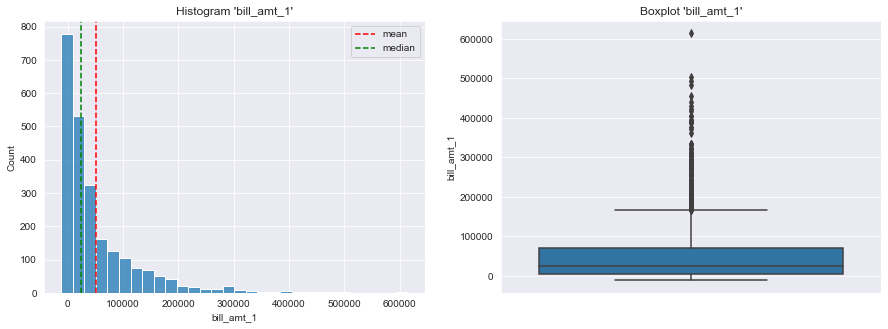

bill_amt_1 Kurtosis: 8.068504483499652
bill_amt_1 Skewness: 2.4676863989821536
Columns 'bill_amt_1' is right skewed


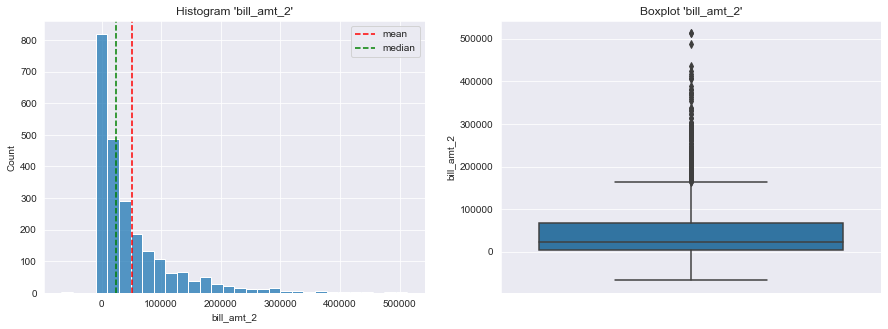

bill_amt_2 Kurtosis: 7.288375539261323
bill_amt_2 Skewness: 2.39714105081471
Columns 'bill_amt_2' is right skewed


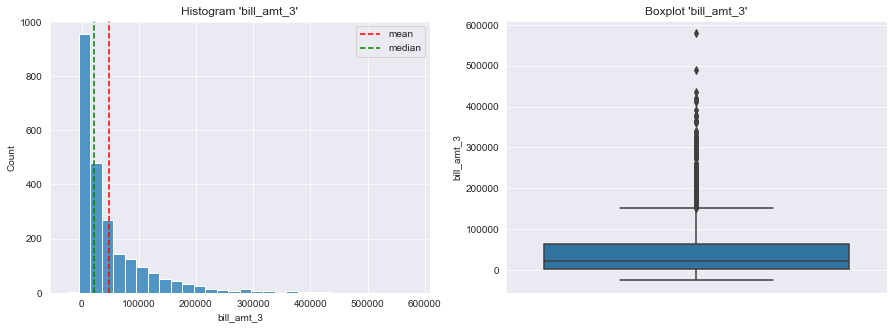

bill_amt_3 Kurtosis: 7.895670219679148
bill_amt_3 Skewness: 2.459152150640834
Columns 'bill_amt_3' is right skewed


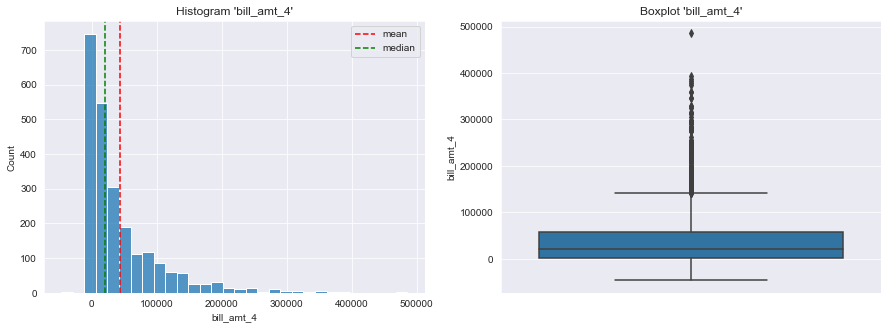

bill_amt_4 Kurtosis: 7.150493384164775
bill_amt_4 Skewness: 2.3784390114613214
Columns 'bill_amt_4' is right skewed


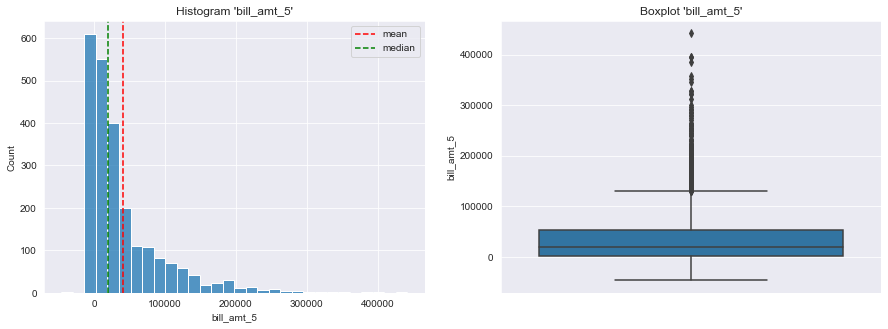

bill_amt_5 Kurtosis: 7.06079650183099
bill_amt_5 Skewness: 2.3707539784601375
Columns 'bill_amt_5' is right skewed


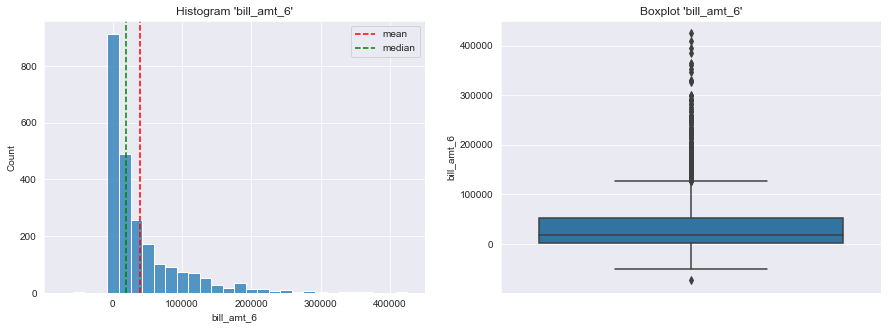

bill_amt_6 Kurtosis: 7.3597044390295006
bill_amt_6 Skewness: 2.405192503695085
Columns 'bill_amt_6' is right skewed


In [232]:
#plotting the distributin of the column with previous function
plot_dist(data_train, 'bill_amt_1')
plot_dist(data_train, 'bill_amt_2')
plot_dist(data_train, 'bill_amt_3')
plot_dist(data_train, 'bill_amt_4')
plot_dist(data_train, 'bill_amt_5')
plot_dist(data_train, 'bill_amt_6')

4.15 Inisght from pay amt
- All the columns (from pay amt_1 tp pay_amt_6) are extremely right-skew.
- All the columns also have outliers in them.

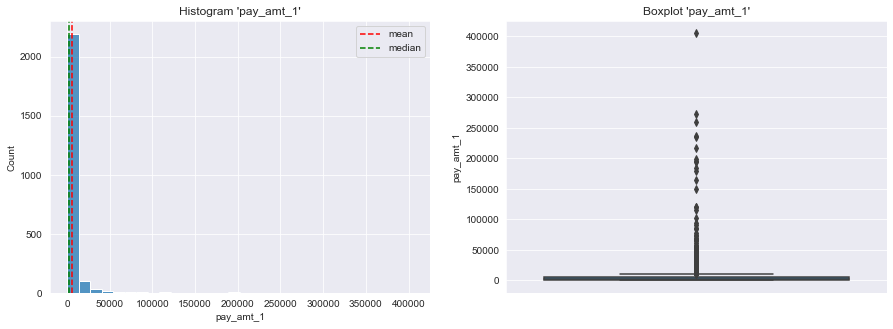

pay_amt_1 Kurtosis: 150.7050155992759
pay_amt_1 Skewness: 10.795728988161231
Columns 'pay_amt_1' is right skewed


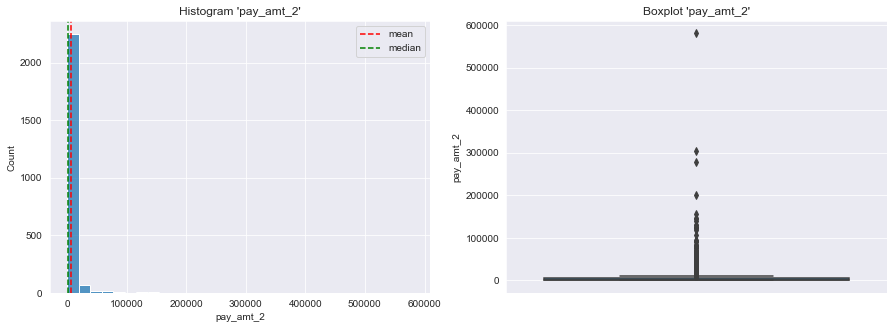

pay_amt_2 Kurtosis: 366.5184387951393
pay_amt_2 Skewness: 15.546622306588333
Columns 'pay_amt_2' is right skewed


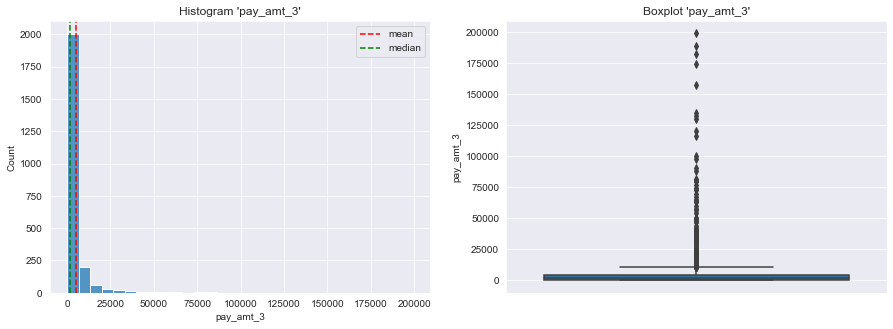

pay_amt_3 Kurtosis: 84.77982481661994
pay_amt_3 Skewness: 8.078936669119615
Columns 'pay_amt_3' is right skewed


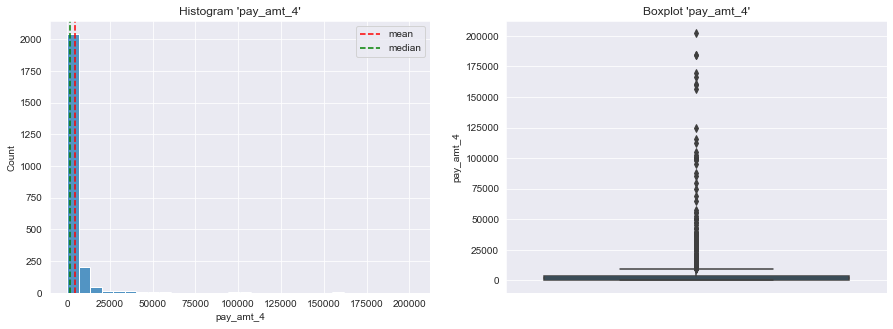

pay_amt_4 Kurtosis: 83.983809671953
pay_amt_4 Skewness: 8.307261288311949
Columns 'pay_amt_4' is right skewed


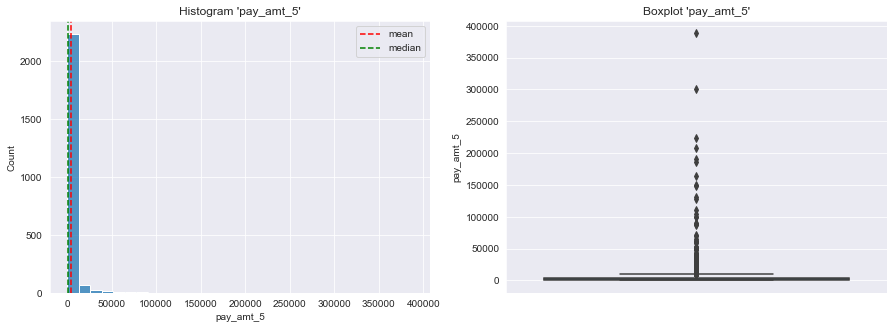

pay_amt_5 Kurtosis: 197.73372507481457
pay_amt_5 Skewness: 12.099029467230363
Columns 'pay_amt_5' is right skewed


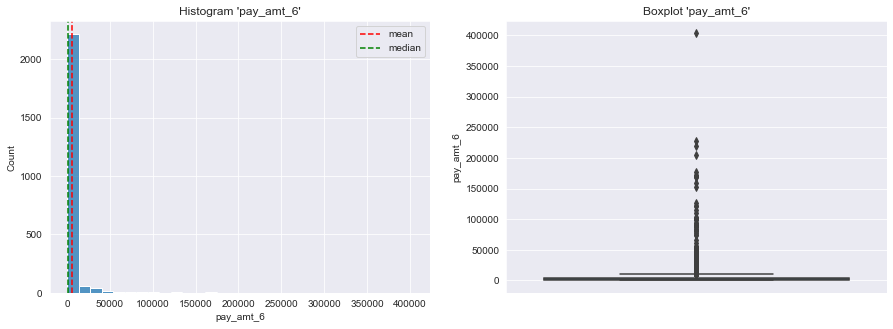

pay_amt_6 Kurtosis: 139.36858836357084
pay_amt_6 Skewness: 9.813732829376178
Columns 'pay_amt_6' is right skewed


In [233]:
#plotting the distributin of the column with previous function
plot_dist(data_train, 'pay_amt_1')
plot_dist(data_train, 'pay_amt_2')
plot_dist(data_train, 'pay_amt_3')
plot_dist(data_train, 'pay_amt_4')
plot_dist(data_train, 'pay_amt_5')
plot_dist(data_train, 'pay_amt_6')

4.16 Checking data distribution from target
- We can conclude that the data from our target is imbalance.
- We need to handle it to make the optimized model.

<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

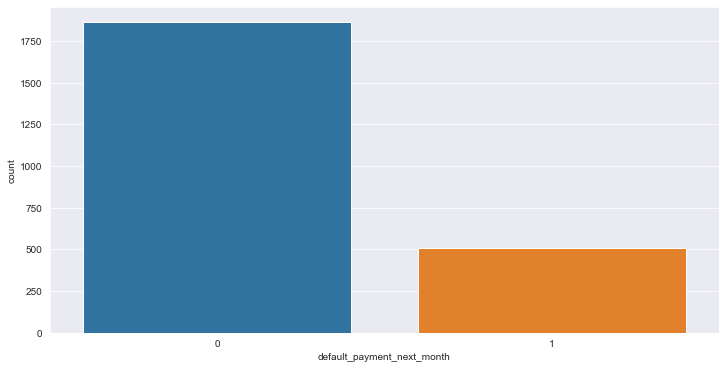

In [234]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=data_train, x='default_payment_next_month')

___

# 5. FEATURE ENGINEERING & SELECTION

5.1 Split train and dev
- Here I split once again between data train and dev.
- So, the data dev won't be affected with several treatment like outliers & imbalance data handling.
- Total data train now become 1896 rows.

In [235]:
#splitting the data train and test
train, dev  = train_test_split(data_train, train_size=0.8, random_state=31397, stratify=data_train['default_payment_next_month'])
print('The new shape of our data train is ', train.shape)
train.head()

The new shape of our data train is  (1896, 24)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
984,20000,2,3,1,52,2,0,0,0,0,...,16460,17380,17650,1536,1600,1600,1500,700,2900,1
1223,50000,2,2,1,47,0,0,0,0,0,...,21781,17792,16657,2000,1700,2000,1000,702,600,0
1703,160000,2,1,1,31,2,2,2,0,0,...,149053,136809,140678,7501,0,5790,4825,6000,5354,0
145,20000,1,2,1,31,0,0,0,0,0,...,6654,6786,7077,1239,1254,1111,243,400,252,1
1791,200000,1,2,2,32,2,2,2,2,2,...,90120,93629,96980,0,7421,0,5000,5000,5000,1


5.2 Feature selection with K-Best
- Here I use SelectkBest to see the correlations between features and target.
- To reduce cardinality and variance, I will use the features that have score >= 4.0

In [236]:
from sklearn.feature_selection import SelectKBest

# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
K_best = SelectKBest(k=4)
train_K_best = K_best.fit(train.drop(columns='default_payment_next_month', axis=1), train['default_payment_next_month'])
K_best_scores = np.round_(train_K_best.scores_)

# assign to data frame and make the descending index
df_K_best_Scores = pd.Series(K_best_scores)
df_K_best_Scores.index = train.drop(columns='default_payment_next_month', axis=1).columns
df_K_best_Scores.sort_values(ascending=False)


pay_0              244.0
pay_2              154.0
pay_3              138.0
pay_4              126.0
pay_5              121.0
pay_6              116.0
limit_balance       71.0
pay_amt_3           15.0
pay_amt_2           12.0
pay_amt_1            9.0
pay_amt_5            9.0
pay_amt_6            6.0
pay_amt_4            4.0
education_level      3.0
bill_amt_4           2.0
bill_amt_3           1.0
bill_amt_5           1.0
bill_amt_6           1.0
sex                  1.0
marital_status       1.0
bill_amt_1           1.0
bill_amt_2           0.0
age                  0.0
dtype: float64

5.3 Selecting the features
- Here I reselecting the features based on K-Best score >= 4.0
- We now have 13 features in total.

In [237]:
train_selected_features = train[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

5.4 Handling Outliers for all number columns in data train
- Here I use the Winsorizer to cap the bottom and upper outliers IQR.
- The method is IQR, and the fold is 3, since some of the data are extremely skew.

In [238]:
from feature_engine.outliers import Winsorizer

capper_winsor = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])
capper_winsor.fit(train_selected_features)
train_clean = capper_winsor.transform(train_selected_features)

5.3 Splitting the number & category columns from data train
- After some research I did, I exclude the sex & marital status. It's said that the marital status & sex won't affect the credit status.
- Then, in this case I don't have nominal columns.
- And for the ordinal columns have been encoded.
- We also will separate the y train in this step.

In [239]:
train_number_columns = train_clean[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
train_ordinal_columns = train_clean[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

y_train = train['default_payment_next_month']

5.4 Scaling the number columns of data train
- Here I use MinMaxScaler since some of the columns are extremely skew.

In [240]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#fit the scaler
scaler = MinMaxScaler()
scaler.fit(train_number_columns)

#transform the x_train number and assign to dataframe
X_train_number = scaler.transform(train_number_columns)
df_X_train_number = pd.DataFrame(X_train_number)
df_X_train_number.head()

,0,1,2,3,4,5,6
0,0.018182,0.089584,0.093213,0.096370,0.099564,0.046811,0.187009
1,0.072727,0.116645,0.099039,0.120462,0.066376,0.046945,0.038692
2,0.272727,0.437478,0.000000,0.348737,0.320263,0.401237,0.345258
3,0.018182,0.072262,0.073056,0.066917,0.016129,0.026749,0.016250
4,0.345455,0.000000,0.432333,0.000000,0.331879,0.334364,0.322430


5.5 Concatting the scaled train columns with the ordinal columns of data train
- Note that the ordinal columns don't need to be encoded again, since they have been encoded in ordinay way from the original dataset.

In [241]:
X_train= pd.concat([df_X_train_number, train_ordinal_columns.reset_index(drop=True)], axis=1)
X_train.head()

,0,1,2,3,4,5,6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.018182,0.089584,0.093213,0.096370,0.099564,0.046811,0.187009,2,0,0,0,0,0
1,0.072727,0.116645,0.099039,0.120462,0.066376,0.046945,0.038692,0,0,0,0,0,0
2,0.272727,0.437478,0.000000,0.348737,0.320263,0.401237,0.345258,2,2,2,0,0,0
3,0.018182,0.072262,0.073056,0.066917,0.016129,0.026749,0.016250,0,0,0,0,0,0
4,0.345455,0.000000,0.432333,0.000000,0.331879,0.334364,0.322430,2,2,2,2,2,2


**DATA DEV PREPROCESSING**

5.7 Splitting the number & category columns from data dev
- The same with data train, I exclude some columns based on K-Best score.
- We also will separate the y dev here.

In [242]:
dev_number_columns = dev[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
dev_ordinal_columns = dev[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

y_dev = dev['default_payment_next_month']

5.8 Scaling the number columns of data dev

In [243]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#fit the scaler
scaler = MinMaxScaler()
scaler.fit(dev_number_columns)

#transform the x_train number and assign to dataframe
X_dev_number = scaler.transform(dev_number_columns)
df_X_dev_number = pd.DataFrame(X_dev_number)
df_X_dev_number.head()

,0,1,2,3,4,5,6
0,0.220779,0.000000,0.000000,0.056791,0.000000,0.000000,0.000000
1,0.012987,0.008143,0.006602,0.000000,0.005881,0.000000,0.002478
2,0.012987,0.016410,0.000000,0.000000,0.072636,0.036317,0.004957
3,0.142857,0.000000,0.026069,0.020961,0.019407,0.000000,0.007804
4,0.168831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


5.9 Concatting the scaled train columns with the ordinal columns of data dev

In [244]:
X_dev = pd.concat([df_X_dev_number, dev_ordinal_columns.reset_index(drop=True)], axis=1)
X_dev.head()

,0,1,2,3,4,5,6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.220779,0.000000,0.000000,0.056791,0.000000,0.000000,0.000000,-1,2,2,-1,0,0
1,0.012987,0.008143,0.006602,0.000000,0.005881,0.000000,0.002478,2,0,0,2,2,2
2,0.012987,0.016410,0.000000,0.000000,0.072636,0.036317,0.004957,1,2,3,2,-1,0
3,0.142857,0.000000,0.026069,0.020961,0.019407,0.000000,0.007804,2,2,2,2,2,2
4,0.168831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,-2,-2,-2,-2


5.10 Checking the target class balance
- Total class 0 are 1490, and class 1 are 406.
- The target data is so imbalance.
- So, we need to handle it to make the optimized model.

In [245]:
train['default_payment_next_month'].value_counts()

0    1490
1     406
Name: default_payment_next_month, dtype: int64

5.11 Balancing target class using SMOTENC
- Here I use SMOTENC to balancing the class in the target.
- SMOTENC can handle category as well.
- Then, we have balance class in target which is 1490 for both of them.

In [246]:
from imblearn.over_sampling import SMOTENC

# Resampling the minority class. The strategy can be changed as required.
smotenc = SMOTENC([7, 8, 9, 10, 11, 12], sampling_strategy='minority', random_state=4142)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = smotenc.fit_resample(X_train, y_train)
oversampled = pd.concat([oversampled_X, oversampled_Y], axis=1)

oversampled['default_payment_next_month'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


1    1490
0    1490
Name: default_payment_next_month, dtype: int64

<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

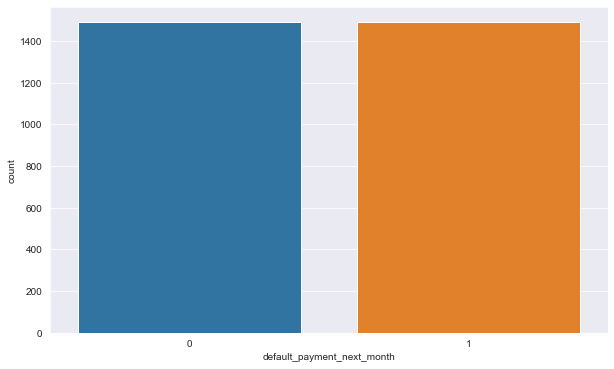

In [247]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=oversampled, x='default_payment_next_month')

In [248]:
oversampled.head()

,0,1,2,3,4,5,6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.018182,0.089584,0.093213,0.096370,0.099564,0.046811,0.187009,2,0,0,0,0,0,1
1,0.072727,0.116645,0.099039,0.120462,0.066376,0.046945,0.038692,0,0,0,0,0,0,0
2,0.272727,0.437478,0.000000,0.348737,0.320263,0.401237,0.345258,2,2,2,0,0,0,0
3,0.018182,0.072262,0.073056,0.066917,0.016129,0.026749,0.016250,0,0,0,0,0,0,1
4,0.345455,0.000000,0.432333,0.000000,0.331879,0.334364,0.322430,2,2,2,2,2,2,1


In [249]:
oversampled.head()

,0,1,2,3,4,5,6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.018182,0.089584,0.093213,0.096370,0.099564,0.046811,0.187009,2,0,0,0,0,0,1
1,0.072727,0.116645,0.099039,0.120462,0.066376,0.046945,0.038692,0,0,0,0,0,0,0
2,0.272727,0.437478,0.000000,0.348737,0.320263,0.401237,0.345258,2,2,2,0,0,0,0
3,0.018182,0.072262,0.073056,0.066917,0.016129,0.026749,0.016250,0,0,0,0,0,0,1
4,0.345455,0.000000,0.432333,0.000000,0.331879,0.334364,0.322430,2,2,2,2,2,2,1


5.12 Re-assign the X & y train from the oversampled dataset.

In [250]:
X_train_number = train[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_train_columns = train[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]



In [251]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#fit the scaler
scaler = MinMaxScaler()
scaler.fit(X_train_number)

#transform the x_train number and assign to dataframe
X_train_number = scaler.transform(X_train_number)
df_X_train_number = pd.DataFrame(X_train_number)
df_X_train_number.head()

,0,1,2,3,4,5,6
0,0.018182,0.003792,0.002756,0.008032,0.007423,0.001804,0.012703
1,0.072727,0.004938,0.002929,0.010040,0.004949,0.001809,0.002628
2,0.272727,0.018520,0.000000,0.029065,0.023877,0.015461,0.023452
3,0.018182,0.003059,0.002160,0.005577,0.001203,0.001031,0.001104
4,0.345455,0.000000,0.012785,0.000000,0.024743,0.012884,0.021901


In [252]:
y_train = train['default_payment_next_month']

In [253]:
X_train = pd.concat([df_X_train_number.reset_index(drop=True), X_train_columns.reset_index(drop=True)], axis=1)
X_train


,0,1,2,3,4,5,6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.018182,0.003792,0.002756,0.008032,0.007423,0.001804,0.012703,2,0,0,0,0,0
1,0.072727,0.004938,0.002929,0.010040,0.004949,0.001809,0.002628,0,0,0,0,0,0
2,0.272727,0.018520,0.000000,0.029065,0.023877,0.015461,0.023452,2,2,2,0,0,0
3,0.018182,0.003059,0.002160,0.005577,0.001203,0.001031,0.001104,0,0,0,0,0,0
4,0.345455,0.000000,0.012785,0.000000,0.024743,0.012884,0.021901,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,0.072727,0.004938,0.004135,0.002108,0.002969,0.001546,0.002190,0,0,0,2,2,0
1892,0.290909,0.016049,0.012232,0.030621,0.029692,0.014430,0.033728,2,0,0,0,0,0
1893,0.545455,0.641950,0.017228,0.050199,0.049486,0.025768,0.043802,-2,-1,0,0,0,0
1894,0.236364,0.013602,0.012273,0.014387,0.019958,0.015343,0.013666,0,0,0,0,0,0


____

# 6. MODEL DEFINITION

6.1 Assign the model and fit it with X_train and y_train

In [254]:
from sklearn.tree import DecisionTreeClassifier

model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier()

___

# **DECISION TREE**

# 7. MODEL EVALUATION

7.1 Predict the y predict with Decision Tree

In [255]:
y_train_predict_dec_tree = model_dec_tree.predict(X_train)
y_train_predict_proba_dec_tree = model_dec_tree.predict_proba(X_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


7.2 Classification Report y train
- ROC AUC score is 0.99 which means our model can distinguish between class 0 and 1.
- All the train predict's scores are right for both class.
- This score is too good to be true.
- This may lead us to be an over-fit model.
- The model can predict with 100% for both class, simply because we don't set any max_depth in hyper-parameter. 
- So, the model expands the nodes of the dataset until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [256]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_dec_tree[:, 1]))
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_dec_tree))

ROC AUC score train :  0.9999652858134691
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1490
           1       1.00      0.99      0.99       406

    accuracy                           1.00      1896
   macro avg       1.00      0.99      1.00      1896
weighted avg       1.00      1.00      1.00      1896



7.3 Predict & Classification Report y dev
- As we can see below the F1 score for the predicted y_dev is 0.62 for class 0, and 0.37 for 1, which means our model is not too smart enough to distinguish the class 0 & 1 in data dev.
- As expected our model is over-fit, because our model too much/too be specific learning from our data train.
- Since the class in data dev is imbalance, 372 for class 0 and 102 for class 1, we can't solely use accuracy score for evaluation metric.
- We need to use F1-score instead.
- However, as we could see there is high gap between F1-score for class 0 & 1.
- This iis because our class imbalance in the target we can't expect the F1-score is good either.
- We need to focus whether to precision or recall.
- Since the objective of our model is to predict the default_payment_next_month, whether the user default or not, we need to focus to default one, which class 1.
- A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months. So, we need to reduce the amount of False Negative as much as possible, to reduce loss of our business.
- Then we need to focus to Recall instead.
- And, in this session the score for recall is 0.49 for class 0 and 0.65 for class 1, which is not good enough and need improvement.

In [257]:
y_dev_predict_dec_tree = model_dec_tree.predict(X_dev)
y_dev_predict_proba_dec_tree = model_dec_tree.predict_proba(X_dev)

print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_dec_tree[:, 1]))
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_dec_tree))

ROC AUC score dev :  0.6047728231077377
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       372
           1       0.34      0.44      0.38       102

    accuracy                           0.70       474
   macro avg       0.59      0.60      0.59       474
weighted avg       0.73      0.70      0.71       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


____

# 8. MODEL IMPROVEMENT

8.1 Set hyper-parameter in Decision Tree model
- To prevent an over-fit model, I set hyper-parameter of max_depth to 15, so the leaves won't be pure.
- In this case, the model won't learn too much from the data train, but instead have to learn by itself from the data X_dev.
- Then we fit once again the model to X_train and y_train.

In [258]:
model_dec_tree_improve = DecisionTreeClassifier(max_depth=15)
model_dec_tree_improve.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(max_depth=15)

8.2 Predict & scoring
- The ROC AUC score of data train is decreasing to 0.99, which means the model have less variance than before.
- But, ROC AUC score for data dev increasing to 0.59.
- The recall score in data dev, for both classes are better. 
- Which means the model is getting better for predicting both classes.
- Overall, our model is not good enough and need more improvement.

In [259]:
y_train_predict_dec_tree_improve = model_dec_tree_improve.predict(X_train)
y_train_predict_proba_dec_tree = model_dec_tree_improve.predict_proba(X_train)
y_dev_predict_proba_dec_tree = model_dec_tree_improve.predict_proba(X_dev)
y_dev_predict_dec_tree_improve = model_dec_tree_improve.predict(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_dec_tree[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_dec_tree[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_dec_tree_improve))
print('='*10, 'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_dec_tree_improve))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.9680265811485437
ROC AUC score dev :  0.6191888045540797
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1490
           1       0.99      0.78      0.87       406

    accuracy                           0.95      1896
   macro avg       0.97      0.89      0.92      1896
weighted avg       0.95      0.95      0.95      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       372
           1       0.44      0.41      0.42       102

    accuracy                           0.76       474
   macro avg       0.64      0.63      0.64       474
weighted avg       0.75      0.76      0.76       474



**DECISION TREE WITH K-FOLD CROSS VALIDATION**

8.3 Cross Validation
- Here I use K-fold as cross validation method.
- Then, using the recall as the score.
- The mean score of the model is 0.76, which is a better than default & improved model.

In [260]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)
results=cross_val_score(model_dec_tree_improve,X_train,y_train,cv=10,scoring='recall')
print(results)
print(np.mean(results))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

[0.31707317 0.41463415 0.43902439 0.31707317 0.26829268 0.31707317
 0.35       0.325      0.35       0.4       ]
0.3498170731707317


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


**DECISION TREE WITH STRATIFIED K-FOLD CROSS VALIDATION**

8.4 Cross Validation wth Starified K-fold
- Here I use stratified K-fold to check whether the movel could improve or not.
- The score is worse than original K-fold.

In [261]:
from sklearn.model_selection import StratifiedKFold

skfold_validation=StratifiedKFold(n_splits=5)
scores=cross_val_score(model_dec_tree_improve,X_train,y_train,cv=skfold_validation,scoring="recall")
print(scores)
print(np.mean(scores))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

[0.41463415 0.28395062 0.48148148 0.34567901 0.44444444]
0.39403794037940376


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

**DECISION TREE WITH GRIDSEARCHCV**

8.5 Improvement with GridSearchCV
- Another way to improve the model is by using grid search CV.
- Here I set the parameter for GridSearchCV to criterion': ['gini', 'entropy'], 'max_depth': [100, 150, 200, 250], 'min_samples_leaf': [2,3,4,5], 'min_samples_split': [2,3,4,5].
- Since we still don't know how is he behaviour of the data, we need to check some of the hyper-parameter setting, and I set as above.

In [262]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [100, 150, 200, 250], 'min_samples_leaf': [2,3,4,5], 'min_samples_split': [2,3,4,5]}

rf_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=param_grid,
                         cv=skfold_validation,
                         n_jobs=-1)

rf_gridcv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 150, 200, 250],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

8.6 Taking the best parameter from GridSearchCV
- Here we can show the best parameter from GridSearchCV.

In [263]:
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 250,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

8.7 Predict the y_train & y_dev using best estimator from GridSearchCV.
- Here I use the best hyper-parameter to predict the data train and data dev.

In [264]:
rf_gridcv_best = rf_gridcv.best_estimator_

y_train_predict_dec_tree_gridcv_best_params = rf_gridcv_best.predict(X_train)
y_dev_predict_dec_tree_gridcv_best_params = rf_gridcv_best.predict(X_dev)

y_train_predict_dec_tree_proba_best_params = rf_gridcv_best.predict_proba(X_train)
y_dev_predict_proba_dec_tree_best_params = rf_gridcv_best.predict_proba(X_dev)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


8.8 Evaluation from GridSearchCV hyper-parameter
- The recall score for train and dev not really improved.

In [265]:
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_dec_tree_proba_best_params[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_dec_tree_best_params[:, 1]))


print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_dec_tree_gridcv_best_params))
print('='*10, 'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_dec_tree_gridcv_best_params))

ROC AUC score train :  0.9719129169835026
ROC AUC score dev :  0.6719375922411975
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1490
           1       0.85      0.72      0.78       406

    accuracy                           0.91      1896
   macro avg       0.89      0.84      0.86      1896
weighted avg       0.91      0.91      0.91      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       372
           1       0.39      0.51      0.44       102

    accuracy                           0.72       474
   macro avg       0.62      0.65      0.63       474
weighted avg       0.75      0.72      0.74       474



____

# 9. K-NEAREST NEIGHBORS / KNN

9.1 Defining and fit the model
- Here I define the model.
- Then fit it with data train.

In [266]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier()

9.2 Predict & scoring
- From the ROC AUC score, KNN model is over-fit.
- However for the recall score is not too bad comparing the decision tree model, eventhough the improvement not so good.

In [267]:
y_train_predict_knn = model_knn.predict(X_train)
y_dev_predict_knn = model_knn.predict(X_dev)

y_train_predict_proba_knn = model_knn.predict_proba(X_train)
y_dev_predict_proba_knn = model_knn.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_knn[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_knn[:, 1]))
print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_knn))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_knn))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.8808865342017391
ROC AUC score dev :  0.7512386675100147
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1490
           1       0.74      0.48      0.58       406

    accuracy                           0.85      1896
   macro avg       0.81      0.72      0.75      1896
weighted avg       0.84      0.85      0.84      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       372
           1       0.60      0.48      0.54       102

    accuracy                           0.82       474
   macro avg       0.74      0.70      0.71       474
weighted avg       0.81      0.82      0.81       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# KNN IMPROVEMENT WITH MANUAL HYPER-PARAMETER TUNING

9.3 Defining the model with hyper-parameter
- Here I set the hyper-parameter to n_neighbors=7 to make many neighbours to the data, and weights=distance just to explore the data behaviour.
- Then, fit the model.

In [268]:
model_knn_improve = KNeighborsClassifier(n_neighbors=7, weights='distance')
model_knn_improve.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=7, weights='distance')

9.4 Evaluation score from improved model
- The data train ROC AUC score is better, but worse for data dev.
- But the recall score is worse for data dev, even for data train is better.

In [269]:
y_train_predict_knn_improve = model_knn_improve.predict(X_train)
y_dev_predict_knn_improve = model_knn_improve.predict(X_dev)

y_train_predict_proba_knn_improve = model_knn_improve.predict_proba(X_train)
y_dev_predict_proba_knn_improve = model_knn_improve.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_knn_improve[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_knn_improve[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_knn_improve))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_knn_improve))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.9999652858134691
ROC AUC score dev :  0.7321447396162766
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1490
           1       1.00      0.99      0.99       406

    accuracy                           1.00      1896
   macro avg       1.00      0.99      1.00      1896
weighted avg       1.00      1.00      1.00      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       372
           1       0.65      0.50      0.57       102

    accuracy                           0.84       474
   macro avg       0.76      0.71      0.73       474
weighted avg       0.82      0.84      0.83       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


___

# 10. NAIVE BAYES

10.1 Define Naive bayes model
- First we define the model.
- Then fit the model to data train.

In [270]:
from sklearn.naive_bayes import GaussianNB

model_naive_bayes = GaussianNB() 
model_naive_bayes.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

10.2 Evaluation Score
- ROC AUC score is not better than previous model, and the model s over-fit.
- Data train recall scores are also getting worse.
- Data dev recall score for class 1 is good, which is 0.84, but this model have the worst recall score for class 0.

In [271]:
y_train_predict_naive_bayes = model_naive_bayes.predict(X_train)
y_dev_predict_naive_bayes = model_naive_bayes.predict(X_dev)

y_train_predict_proba_naive_bayes = model_naive_bayes.predict_proba(X_train)
y_dev_predict_proba_naive_bayes = model_naive_bayes.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_naive_bayes[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_naive_bayes[:, 1]))


print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_naive_bayes))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_naive_bayes))

ROC AUC score train :  0.7431960194399445
ROC AUC score dev :  0.7488799283154122
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.89      0.40      0.55      1490
           1       0.27      0.81      0.40       406

    accuracy                           0.49      1896
   macro avg       0.58      0.61      0.48      1896
weighted avg       0.75      0.49      0.52      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.89      0.51      0.65       372
           1       0.30      0.76      0.43       102

    accuracy                           0.57       474
   macro avg       0.59      0.64      0.54       474
weighted avg       0.76      0.57      0.60       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# NAIVE BAYES IMPROVEMENT WITH MANUAL HYPER-PARAMETER TUNING

10.3 Improve model with manual hyper-parameter tuning
- Here I set var_smoothing to 2, since we don't know the data behaviour and net to explore it further.
- Define the model with hyper-parameter, then fit with data train.

In [272]:
from sklearn.naive_bayes import GaussianNB

model_naive_bayes_improve = GaussianNB(var_smoothing=2) 
model_naive_bayes_improve.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB(var_smoothing=2)

10.4 Evalution of model improvement
- The ROC AUC scores are worse, and model still over-fit.
- Both data train and dev are better in recall score for class 1, but worse for class 0.

In [273]:
y_train_predict_naive_bayes_improve = model_naive_bayes_improve.predict(X_train)
y_dev_predict_naive_bayes_improve = model_naive_bayes_improve.predict(X_dev)

y_train_predict_proba_naive_bayes_improve = model_naive_bayes_improve.predict_proba(X_train)
y_dev_predict_proba_naive_bayes_improve = model_naive_bayes_improve.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_naive_bayes_improve[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_naive_bayes_improve[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_naive_bayes_improve))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_naive_bayes_improve))

ROC AUC score train :  0.7325288458359507
ROC AUC score dev :  0.6942204301075269
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1490
           1       0.73      0.19      0.31       406

    accuracy                           0.81      1896
   macro avg       0.77      0.59      0.60      1896
weighted avg       0.80      0.81      0.77      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       372
           1       0.71      0.20      0.31       102

    accuracy                           0.81       474
   macro avg       0.77      0.59      0.60       474
weighted avg       0.79      0.81      0.76       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


___

# 11. LOGISTIC REGRESSION

11.1 Defining and fit the model
- Here we defining the model and fit the model with data train.
- I set the hyper-parameter n_iter 10000 to optimize the calculation of the model.

In [274]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=10000)
model_logistic.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=10000)

11.2 Predict & model evaluation
- The model is still over-fit.
- Overall scores are worse than before.
- This means our dataset are not linear, and this model won't suit for our dataset.
- I won't do model improvement for this model since the data aren't linear.

In [275]:
y_train_predict_logistic = model_logistic.predict(X_train)
y_dev_predict_logistic = model_logistic.predict(X_dev)

y_train_predict_proba_logistic = model_logistic.predict_proba(X_train)
y_dev_predict_proba_logistic = model_logistic.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_logistic[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_logistic[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_logistic))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_logistic))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.7511885476245579
ROC AUC score dev :  0.6973302761965001
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1490
           1       0.72      0.25      0.37       406

    accuracy                           0.82      1896
   macro avg       0.78      0.61      0.63      1896
weighted avg       0.80      0.82      0.78      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       372
           1       0.82      0.31      0.45       102

    accuracy                           0.84       474
   macro avg       0.83      0.65      0.68       474
weighted avg       0.84      0.84      0.81       474



___

# 12. SUPPOR VECTOR MACHINE / SVM

12.1 Defining and fiit the model
- Here I define the model, and set the parameter to True.
- We imported SVC since this is a classification case.
- Then fit the model.

In [276]:
from sklearn.svm import SVC

model_svc = SVC(probability=True, degree=4, C=2)
model_svc.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(C=2, degree=4, probability=True)

12.2 Predict and model evaluation
- The model is still over-fit if we see from ROC AUC score.
- The recall scores for class 0 is good but bad for class 1 for both train and dev.
- I set the hyper-parameter as above to explore how the data behavior.

In [277]:
y_train_predict_svc = model_svc.predict(X_train)
y_dev_predict_svc = model_svc.predict(X_dev)

y_train_predict_proba_svc = model_svc.predict_proba(X_train)
y_dev_predict_probe_svc = model_svc.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_svc[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_svc[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_svc))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_svc))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.8104043376202599
ROC AUC score dev :  0.7478520978283786
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1490
           1       0.75      0.42      0.54       406

    accuracy                           0.85      1896
   macro avg       0.80      0.69      0.72      1896
weighted avg       0.84      0.85      0.83      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       372
           1       0.73      0.44      0.55       102

    accuracy                           0.84       474
   macro avg       0.79      0.70      0.73       474
weighted avg       0.83      0.84      0.83       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


___

# **PARALLEL ENSEMBLE LEARNING (BAGGING)**

# 13. BAGGING OF DECISION TREE 

13.1 Defining model
- Here I define the model.
- I set the ax_depth=25, max_features="sqrt", max_leaf_nodes=90 to avoiding the over-fit model.
- Then fit the model with data train.

In [278]:
from sklearn.ensemble import BaggingClassifier

bag_clf_random_forest = BaggingClassifier(
    DecisionTreeClassifier(max_depth=25, max_features="sqrt", max_leaf_nodes=90),
    n_estimators=2000, random_state=975)

bag_clf_random_forest.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=90),
                  n_estimators=2000, random_state=975)

13.2 Predict & scoring
- The model is still overfit.
- The model score for class 1 is good for data dev, but worse for class 0.
- The F1-score for data dev also bad either.

In [279]:
y_train_predict_bagging_dt = bag_clf_random_forest.predict(X_train)
y_dev_predict_bagging_dt = bag_clf_random_forest.predict(X_dev)

y_train_predict_proba_bag_random_forest = bag_clf_random_forest.predict_proba(X_train)
y_dev_predict_probe_bag_random_forest = bag_clf_random_forest.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_bag_random_forest[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_bag_random_forest[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_bagging_dt))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_bagging_dt))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.9586256488246769
ROC AUC score dev :  0.7616882774615222
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1490
           1       0.94      0.53      0.68       406

    accuracy                           0.89      1896
   macro avg       0.91      0.76      0.81      1896
weighted avg       0.90      0.89      0.88      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       372
           1       0.72      0.42      0.53       102

    accuracy                           0.84       474
   macro avg       0.79      0.69      0.72       474
weighted avg       0.83      0.84      0.82       474



# 14. RANDOM FOREST

14.1 Defining model
- Here I defining model.
- The model is random forest, which is the way method of baaging decision tree.
- I set the hyper-parameter as above to avoiding the over-fit model.

In [280]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(max_depth=25, n_estimators=2000, max_leaf_nodes=90, random_state=975)
model_random_forest.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(max_depth=25, max_leaf_nodes=90, n_estimators=2000,
                       random_state=975)

14.2 Predict and scoing
- As we can see, overall scores are the same with Bagging of Decision Tree.
- This is because Random Forest is Ensemble Learning of Bagging Decision Tree.

In [281]:
y_train_predict_random_forest = model_random_forest.predict(X_train)
y_dev_predict_random_forest = model_random_forest.predict(X_dev)

y_train_predict_proba_random_forest = model_random_forest.predict_proba(X_train)
y_dev_predict_probe_random_forest = model_random_forest.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_random_forest[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_random_forest[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_random_forest))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_random_forest))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.9586190365986711
ROC AUC score dev :  0.7609767025089605
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1490
           1       0.94      0.54      0.68       406

    accuracy                           0.89      1896
   macro avg       0.92      0.76      0.81      1896
weighted avg       0.90      0.89      0.88      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       372
           1       0.72      0.42      0.53       102

    accuracy                           0.84       474
   macro avg       0.79      0.69      0.72       474
weighted avg       0.83      0.84      0.82       474



___

# **SEQUENTIAL ENSEMBLE LEARNING (BOOSTING)**

# 15. AdaBoost

15.1 Defining and fit the model
- Here I define the model. In this case, I use Decision Tree Classfier model for the Adaboost method of Sequential Ensemble Learnng.
- Set the above hyper-parameter to avoid over-fit model.
- Then fit the model to data train.

In [282]:
from sklearn.ensemble import AdaBoostClassifier

model_ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=0.5, random_state=42)
model_ada_boost.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

15.2 Predict and model evaluation
- The model is super over-fit.
- Recall score for data dev is good for class 1, but bad for class 0.
- We can't say this model is good either.

In [283]:
y_train_predict_ada_boost = model_ada_boost.predict(X_train)
y_dev_predict_ada_boost = model_ada_boost.predict(X_dev)

y_train_predict_proba_ada_boost = model_ada_boost.predict_proba(X_train)
y_dev_predict_probe_ada_boost = model_ada_boost.predict_proba(X_dev)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_ada_boost[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_ada_boost[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_ada_boost))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_ada_boost))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score train :  0.9999586735874632
ROC AUC score dev :  0.6894238878347037
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1490
           1       1.00      0.99      0.99       406

    accuracy                           1.00      1896
   macro avg       1.00      0.99      1.00      1896
weighted avg       1.00      1.00      1.00      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       372
           1       0.47      0.35      0.40       102

    accuracy                           0.77       474
   macro avg       0.65      0.62      0.63       474
weighted avg       0.75      0.77      0.76       474



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


___

# 16.  XGBOOST

16.1 Defining the model
- First we define the model.
- Then, fit the data with train.
- I set the hyper-parameter of n_estimator to limit the estimator number, and avoiding the overfit model.

In [284]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(eta=0.6, subsample=0.1, max_depth=3, n_estimators=100, random_state=42)
model_xgboost.fit(X_train, y_train)

y_train_predict_proba_xgboost = model_xgboost.predict_proba(X_train)
y_dev_predict_proba_xgboost = model_xgboost.predict_proba(X_dev)

y_predict_train_xgboost = model_xgboost.predict(X_train)
y_predict_dev_xgboost = model_xgboost.predict(X_dev)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[09:25:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


16.2 Evaluation Score
- The model is so over-fit.
- Recall score for data dev is good for class 1, but bad for class 0.

In [285]:
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_ada_boost[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_predict_train_xgboost))
print('='*10,'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_predict_dev_xgboost))

ROC AUC score train :  0.8048161801170365
ROC AUC score dev :  0.6894238878347037
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1490
           1       0.58      0.56      0.57       406

    accuracy                           0.82      1896
   macro avg       0.73      0.72      0.73      1896
weighted avg       0.82      0.82      0.82      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       372
           1       0.47      0.45      0.46       102

    accuracy                           0.77       474
   macro avg       0.66      0.66      0.66       474
weighted avg       0.77      0.77      0.77       474



___

# 17. APPLICATION TO DATA TEST

17.1 Splitting the data test
- Here I split the columns of data test from number and ordinal category.
- Also assign the y test.

In [286]:
test_number_columns = data_test[['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
test_ordinal_columns = data_test[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

y_test = data_test['default_payment_next_month']

17.2 Scaling the number columns data test

In [287]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#fit the scaler
scaler = MinMaxScaler()
scaler.fit(test_number_columns)

#transform the x_train number and assign to dataframe
X_test_number = scaler.transform(test_number_columns)
df_X_test_number = pd.DataFrame(X_test_number)
df_X_test_number.head()

,0,1,2,3,4,5,6
0,0.088608,0.013493,0.002142,0.000000,0.051975,0.000000,0.026689
1,0.075949,0.006081,0.003260,0.016101,0.025988,0.012980,0.026689
2,0.050633,0.008108,0.000000,0.017107,0.000000,0.017306,0.000000
3,0.000000,0.000000,0.002860,0.000000,0.002599,0.009778,0.017793
4,0.379747,0.000000,0.007301,0.000000,0.061183,0.000000,0.206751


17.3 Concatting the final X test

In [288]:
X_test= pd.concat([df_X_test_number, test_ordinal_columns.reset_index(drop=True)], axis=1)
X_test.head()

,0,1,2,3,4,5,6,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.088608,0.013493,0.002142,0.000000,0.051975,0.000000,0.026689,0,0,2,2,2,2
1,0.075949,0.006081,0.003260,0.016101,0.025988,0.012980,0.026689,0,0,0,0,0,0
2,0.050633,0.008108,0.000000,0.017107,0.000000,0.017306,0.000000,0,0,2,2,2,2
3,0.000000,0.000000,0.002860,0.000000,0.002599,0.009778,0.017793,1,2,-1,2,0,0
4,0.379747,0.000000,0.007301,0.000000,0.061183,0.000000,0.206751,-2,-2,-2,-2,-2,-2


# APPLICATION MODEL TO DATA TEST

**THE BEST MODEL CONCLUSION**
- In below, I show every score of prediction of every model.
- Overall, the model is over-fit and the score is not too good.
- However, there 2 models that have best score so far. That are RandomForest and SVM.
- But, after several comparison from the score I think Random Forest is the best model and we can tune it to get the best hyper-parameter.

17.4 DECISION TREE

In [289]:
y_test_predict_dec_tree_improve = model_dec_tree_improve.predict(X_test)
y_test_predict_proba_dec_tree_improve = model_dec_tree_improve.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_dec_tree_improve[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_dec_tree[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_dec_tree[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('DecisionTreeClassifier \n', classification_report(y_test, y_test_predict_dec_tree_improve))
print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_dec_tree_improve))
print('='*10, 'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_dec_tree_improve))

ROC AUC score test :  0.6040772532188841
ROC AUC score train :  0.9680265811485437
ROC AUC score dev :  0.6191888045540797
========== Classification Report test ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       466
           1       0.39      0.39      0.39       127

    accuracy                           0.74       593
   macro avg       0.61      0.61      0.61       593
weighted avg       0.74      0.74      0.74       593

========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1490
           1       0.99      0.78      0.87       406

    accuracy                           0.95      1896
   macro avg       0.97      0.89      0.92      1896
weighted avg       0.95      0.95      0.95      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
  

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


17.5 RANDOM FOREST

In [290]:
y_test_predict_random_forest = model_random_forest.predict(X_test)
y_test_predict_proba_random_forest = model_random_forest.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_random_forest[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_random_forest[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_random_forest[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('Random Forest Classifier \n', classification_report(y_test, y_test_predict_random_forest))
print('='*10, 'Classification Report train','='*10)
print('Random Forest Classifier \n', classification_report(y_train, y_train_predict_random_forest))
print('='*10,'Classification Report dev','='*10)
print('Random Forest Classifier \n', classification_report(y_dev, y_dev_predict_random_forest))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score test :  0.779595147173127
ROC AUC score train :  0.9586190365986711
ROC AUC score dev :  0.7609767025089605
========== Classification Report test ==========
Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       466
           1       0.73      0.35      0.48       127

    accuracy                           0.83       593
   macro avg       0.79      0.66      0.69       593
weighted avg       0.82      0.83      0.81       593

========== Classification Report train ==========
Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1490
           1       0.94      0.54      0.68       406

    accuracy                           0.89      1896
   macro avg       0.92      0.76      0.81      1896
weighted avg       0.90      0.89      0.88      1896

========== Classification Report dev ==========
Random Forest Classifie

17.6 ADABOOST

In [291]:
y_test_predict_ada_boost = model_ada_boost.predict(X_test)
y_test_predict_proba_ada_boost = model_ada_boost.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_ada_boost[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_ada_boost[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_ada_boost[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('ADABOOST \n', classification_report(y_test, y_test_predict_ada_boost))
print('='*10, 'ADABOOST Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_ada_boost))
print('='*10,'ADABOOST Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_ada_boost))

ROC AUC score test :  0.6738788820925281
ROC AUC score train :  0.9999586735874632
ROC AUC score dev :  0.6894238878347037
========== Classification Report test ==========
ADABOOST 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       466
           1       0.48      0.31      0.38       127

    accuracy                           0.78       593
   macro avg       0.66      0.61      0.62       593
weighted avg       0.75      0.78      0.76       593

========== ADABOOST Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1490
           1       1.00      0.99      0.99       406

    accuracy                           1.00      1896
   macro avg       1.00      0.99      1.00      1896
weighted avg       1.00      1.00      1.00      1896

========== ADABOOST Report dev ==========
DecisionTreeClassifier 
               precision    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


17.7 KNN

In [305]:
y_test_predict_knn_improve = model_knn_improve.predict(X_test)
y_test_predict_proba_knn_improve = model_knn_improve.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_knn_improve[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_knn_improve[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_knn_improve[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('KNN \n', classification_report(y_test, y_test_predict_knn_improve))
print('='*10, 'Classification Report train','='*10)
print('KNN \n', classification_report(y_train, y_train_predict_knn_improve))
print('='*10,'Classification Report dev','='*10)
print('KNN \n', classification_report(y_dev, y_dev_predict_knn_improve))

ROC AUC score test :  0.7062535906187692
ROC AUC score train :  0.9999652858134691
ROC AUC score dev :  0.7321447396162766
========== Classification Report test ==========
KNN 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       466
           1       0.62      0.42      0.50       127

    accuracy                           0.82       593
   macro avg       0.74      0.67      0.69       593
weighted avg       0.80      0.82      0.81       593

========== Classification Report train ==========
KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1490
           1       1.00      0.99      0.99       406

    accuracy                           1.00      1896
   macro avg       1.00      0.99      1.00      1896
weighted avg       1.00      1.00      1.00      1896

========== Classification Report dev ==========
KNN 
               precision    recall  f1-score   support

   

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


17.8 NAIVE BAYES

In [293]:
y_test_predict_naive_bayes_improve = model_naive_bayes_improve.predict(X_test)
y_test_predict_proba_naive_bayes_improve = model_naive_bayes_improve.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_naive_bayes_improve[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_naive_bayes_improve[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_naive_bayes_improve[:, 1]))


print('='*10, 'Classification Report test','='*10)
print('NAIVE BAYES \n', classification_report(y_test, y_test_predict_naive_bayes_improve))
print('='*10, 'Classification Report train','='*10)
print('NAIVE BAYES \n', classification_report(y_train, y_train_predict_naive_bayes_improve))
print('='*10,'Classification Report dev','='*10)
print('NAIVE BAYES \n', classification_report(y_dev, y_dev_predict_naive_bayes_improve))

ROC AUC score test :  0.7529485316481364
ROC AUC score train :  0.7325288458359507
ROC AUC score dev :  0.6942204301075269
========== Classification Report test ==========
NAIVE BAYES 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       466
           1       0.84      0.21      0.34       127

    accuracy                           0.82       593
   macro avg       0.83      0.60      0.62       593
weighted avg       0.83      0.82      0.78       593

========== Classification Report train ==========
NAIVE BAYES 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1490
           1       0.73      0.19      0.31       406

    accuracy                           0.81      1896
   macro avg       0.77      0.59      0.60      1896
weighted avg       0.80      0.81      0.77      1896

========== Classification Report dev ==========
NAIVE BAYES 
               precision    recall 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


17.9 LOGISTIC REGRESSION

In [294]:
y_test_predict_logistic = model_logistic.predict(X_test)
y_test_predict_proba_logistic = model_logistic.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_logistic[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_logistic[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_logistic[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('LOGISTIC REGRESSION  \n', classification_report(y_test, y_test_predict_logistic))
print('='*10, 'Classification Report train','='*10)
print('LOGISTIC REGRESSION \n', classification_report(y_train, y_train_predict_logistic))
print('='*10,'Classification Report dev','='*10)
print('LOGISTIC REGRESSION \n', classification_report(y_dev, y_dev_predict_logistic))

ROC AUC score test :  0.785390828292386
ROC AUC score train :  0.7511885476245579
ROC AUC score dev :  0.6973302761965001
========== Classification Report test ==========
LOGISTIC REGRESSION  
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       466
           1       0.82      0.31      0.45       127

    accuracy                           0.84       593
   macro avg       0.83      0.65      0.68       593
weighted avg       0.83      0.84      0.81       593

========== Classification Report train ==========
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1490
           1       0.72      0.25      0.37       406

    accuracy                           0.82      1896
   macro avg       0.78      0.61      0.63      1896
weighted avg       0.80      0.82      0.78      1896

========== Classification Report dev ==========
LOGISTIC REGRESSION 
           

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


17.10 SVM

In [295]:
y_test_predict_svc = model_svc.predict(X_test)
y_test_predict_probe_svc = model_svc.predict_proba(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_probe_svc[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_svc[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_svc[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('Support Vector Classifier without imbalance handling \n', classification_report(y_test, y_test_predict_svc))
print('='*10, 'Classification Report train','='*10)
print('Support Vector Classifier without imbalance handling \n', classification_report(y_train, y_train_predict_svc))
print('='*10,'Classification Report dev','='*10)
print('Support Vector Classifier without imbalance handling \n', classification_report(y_dev, y_dev_predict_svc))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ROC AUC score test :  0.7552127336014328
ROC AUC score train :  0.8104043376202599
ROC AUC score dev :  0.7478520978283786
========== Classification Report test ==========
Support Vector Classifier without imbalance handling 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       466
           1       0.73      0.40      0.52       127

    accuracy                           0.84       593
   macro avg       0.79      0.68      0.71       593
weighted avg       0.83      0.84      0.82       593

========== Classification Report train ==========
Support Vector Classifier without imbalance handling 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1490
           1       0.75      0.42      0.54       406

    accuracy                           0.85      1896
   macro avg       0.80      0.69      0.72      1896
weighted avg       0.84      0.85      0.83      1896

========== Cla

17.11 XGBOOST

In [296]:
y_test_predict_proba_xgboost = model_xgboost.predict_proba(X_test)
y_test_train_xgboost = model_xgboost.predict(X_test)

print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_xgboost[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_probe_ada_boost[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('XGBOOST \n', classification_report(y_test, y_test_train_xgboost))
print('='*10, 'Classification Report train','='*10)
print('XGBOOST \n', classification_report(y_train, y_predict_train_xgboost))
print('='*10,'Classification Report dev','='*10)
print('XGBOOST \n', classification_report(y_dev, y_predict_dev_xgboost))

ROC AUC score test :  0.6762867087965936
ROC AUC score train :  0.8048161801170365
ROC AUC score dev :  0.6894238878347037
========== Classification Report test ==========
XGBOOST 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       466
           1       0.39      0.48      0.43       127

    accuracy                           0.73       593
   macro avg       0.62      0.64      0.63       593
weighted avg       0.75      0.73      0.74       593

========== Classification Report train ==========
XGBOOST 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1490
           1       0.58      0.56      0.57       406

    accuracy                           0.82      1896
   macro avg       0.73      0.72      0.73      1896
weighted avg       0.82      0.82      0.82      1896

========== Classification Report dev ==========
XGBOOST 
               precision    recall  f1-score   

____

# 18. HYPER-PARAMETER TUNING THE BEST MODEL WITH GRIDSEARCHCV

18.1 Set the parameter and fit.
- Here I set the hyper-parameter that will be combined in gridsearch to optimized the model.
- The fit the model to train data.

In [297]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [6, 7, 8], 'max_features': ['auto'], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [2,3], 'n_estimators': [50, 100]}


rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=skfold_validation,
                         n_jobs=-1, scoring='recall')

rf_gridcv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             scoring='recall')

18.2 Getting the best hyoer-parameter.

In [298]:
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

18.3 Predict with best parameter.

In [299]:
rf_gridcv_best = rf_gridcv.best_estimator_
y_test_predict_grid = rf_gridcv_best.predict(X_test)
y_train_predict_grid = rf_gridcv_best.predict(X_train)
y_dev_predict_grid = rf_gridcv_best.predict(X_dev)

y_test_predict_proba_grid = rf_gridcv_best.predict_proba(X_test)
y_train_predict_proba_grid = rf_gridcv_best.predict_proba(X_train)
y_dev_predict_proba_grid = rf_gridcv_best.predict_proba(X_dev)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

18.4 Evaluation Model and Score
- The overall scores are better than the original parameter.
- But, it's still over-fit.
- Perhaps, it's because the imbalance data in the first place.

In [300]:
print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_grid[:, 1]))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_grid[:, 1]))
print('ROC AUC score dev : ', roc_auc_score(y_dev, y_dev_predict_proba_grid[:, 1]))

print('='*10, 'Classification Report test','='*10)
print('DecisionTreeClassifier \n', classification_report(y_test, y_test_predict_grid))
print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_grid))
print('='*10, 'Classification Report dev','='*10)
print('DecisionTreeClassifier \n', classification_report(y_dev, y_dev_predict_grid))

ROC AUC score test :  0.7893531817106552
ROC AUC score train :  0.9022522894832546
ROC AUC score dev :  0.7593163609529834
========== Classification Report test ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       466
           1       0.76      0.39      0.52       127

    accuracy                           0.84       593
   macro avg       0.81      0.68      0.71       593
weighted avg       0.83      0.84      0.82       593

========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1490
           1       0.86      0.46      0.60       406

    accuracy                           0.87      1896
   macro avg       0.87      0.72      0.76      1896
weighted avg       0.87      0.87      0.85      1896

========== Classification Report dev ==========
DecisionTreeClassifier 
  

____

# OVERALL CONCLUSION

- The best model so far is Random Forest.
- It's hard to get our best model since the dataset is originally imbalance.
- We can set th hyper-parameter to get the better model.
- There are many models of machine learning and we need to know the behaviour of our dataset to make optimized model.
- When the target class is imbalance we can't use accuracy metric score. Instead we need to use F1 score, recall or precision depend on the occasion.